In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [5]:
df = pd.read_csv("../../src/data/city_growth_models/kenya-populationland-area-population-density_by_subcounty_2019.csv") 

In [6]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Distribution of Population by Land Area and Po...,NaN,NaN,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN,NaN,NaN
2,https://wwwknbsorke/?wpdmpro=2019-kenya-popula...,NaN,NaN,NaN
3,"Population, Land area, Population density, Sub...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
397,Makadara,189536,11.7,16150
398,Mathare,206564,3,68941
399,Njiru .,626482,129.9,4821
400,Starehe,210423,20.6,10205


In [7]:
df = df.rename(columns={
    'National/ County': 'National/Country',
})
df 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Distribution of Population by Land Area and Po...,NaN,NaN,NaN
1,Source: 2019 Kenya Population and Housing Cens...,NaN,NaN,NaN
2,https://wwwknbsorke/?wpdmpro=2019-kenya-popula...,NaN,NaN,NaN
3,"Population, Land area, Population density, Sub...",NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
397,Makadara,189536,11.7,16150
398,Mathare,206564,3,68941
399,Njiru .,626482,129.9,4821
400,Starehe,210423,20.6,10205


In [8]:
df.shape

(402, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  401 non-null    object
 1   Unnamed: 1  397 non-null    object
 2   Unnamed: 2  397 non-null    object
 3   Unnamed: 3  397 non-null    object
dtypes: object(4)
memory usage: 12.7+ KB


In [10]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
count,401,397,397,397
unique,394,395,392,308
top,Mt. Kenya Fores t*,0,141.7,0
freq,4,3,2,12


In [11]:
df.isnull().sum()

Unnamed: 0    1
Unnamed: 1    5
Unnamed: 2    5
Unnamed: 3    5
dtype: int64

### Encoding and Cleaning

In [12]:
df['National/Country'].unique()

KeyError: 'National/Country'

In [ ]:
df['National/Country'] = df['National/Country'].str.replace(' ','')

In [ ]:
df['National/Country'].unique() 

array(['Kenya', 'Mombasa', 'Changamwe', 'Jomvu', 'Kisauni', 'Likoni',
       'Mvita', 'Nyali', 'Kwale', 'Kinango', 'Lungalunga', 'Matuga',
       'Msambweni', 'Samburu-Kwale', 'Kilifi', 'Chonyi', 'Ganze',
       'Kaloleni', 'Kauma', 'KilifiNorth', 'KilifiSouth', 'Magarini',
       'Malindi', 'Rabai', 'TanaRiver', 'TanaNorth', 'TanaDelta', 'Lamu',
       'LamuEast', 'LamuWest', 'Taita/Taveta', 'Mwatate', 'Taita',
       'Taveta', 'Voi', 'Garissa', 'Balambala', 'Dadaab', 'Fafi',
       'Hulugho', 'Ijara', 'Lagdera', 'Wajir.', 'Buna.', 'Eldas.',
       'Habaswein', 'Tarbaj.', 'WajirEast', 'WajirNorth', 'WajirSouth',
       'WajirWest', 'Mandera', 'ManderaWest', 'Banisa', 'Kutulo',
       'Lafey.', 'ManderaCentral', 'ManderaEast', 'ManderaNorth',
       'Marsabit', 'Loiyangalani', 'MarsabitCentral', 'MarsabitNorth',
       'MarsabitSouth', 'Moyale', 'NorthHorr', 'Sololo', 'Isiolo.',
       'Garbatulla', 'Merti.', 'Meru.', 'BuuriEast', 'BuuriWest',
       'IgembeCentral.', 'IgembeNorth', 'I

In [ ]:
df.head(59)

,National/Country,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
0,Kenya,47564296,580876.3,82
1,Mombasa,1208333,219.9,5495
2,Changamwe,131882,17.7,7457
3,Jomvu,163415,36.9,4432
4,Kisauni,291930,87.7,3328
5,Likoni,250358,40.5,6187
6,Mvita,154171,14.6,10543
7,Nyali,216577,22.5,9610
8,Kwale,866820,8267.1,105
9,Kinango,94220,1614.0,58


In [ ]:
df['National/Country'] = df['National/Country'].replace('\.', '', regex=True)


In [ ]:
df['National/Country'].unique()

array(['Kenya', 'Mombasa', 'Changamwe', 'Jomvu', 'Kisauni', 'Likoni',
       'Mvita', 'Nyali', 'Kwale', 'Kinango', 'Lungalunga', 'Matuga',
       'Msambweni', 'Samburu-Kwale', 'Kilifi', 'Chonyi', 'Ganze',
       'Kaloleni', 'Kauma', 'KilifiNorth', 'KilifiSouth', 'Magarini',
       'Malindi', 'Rabai', 'TanaRiver', 'TanaNorth', 'TanaDelta', 'Lamu',
       'LamuEast', 'LamuWest', 'Taita/Taveta', 'Mwatate', 'Taita',
       'Taveta', 'Voi', 'Garissa', 'Balambala', 'Dadaab', 'Fafi',
       'Hulugho', 'Ijara', 'Lagdera', 'Wajir', 'Buna', 'Eldas',
       'Habaswein', 'Tarbaj', 'WajirEast', 'WajirNorth', 'WajirSouth',
       'WajirWest', 'Mandera', 'ManderaWest', 'Banisa', 'Kutulo', 'Lafey',
       'ManderaCentral', 'ManderaEast', 'ManderaNorth', 'Marsabit',
       'Loiyangalani', 'MarsabitCentral', 'MarsabitNorth',
       'MarsabitSouth', 'Moyale', 'NorthHorr', 'Sololo', 'Isiolo',
       'Garbatulla', 'Merti', 'Meru', 'BuuriEast', 'BuuriWest',
       'IgembeCentral', 'IgembeNorth', 'IgembeSout

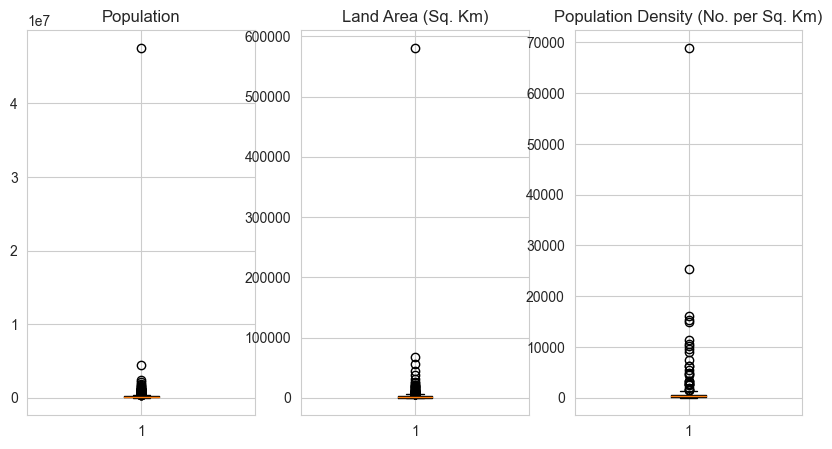

In [ ]:
columns = ['Population','Land Area (Sq. Km)','Population Density (No. per Sq. Km)']
fig, axs = plt.subplots(ncols=len(columns), figsize=(10, 5))
for i, col in enumerate(columns):
    axs[i].boxplot(df[col])
    axs[i].set_title(col)
    
plt.show()

In [ ]:
def detect_outliers(dataset, columns):
    df = dataset.copy()
    z_scores = stats.zscore(df[columns])
    outliers = df[(z_scores < -3) | (z_scores > 3)]
    print(f"The number of outliers: {outliers.shape[0]}")
    outlier_indices = outliers.index.tolist()
    df = df[(z_scores > -3) & (z_scores < 3)].reset_index(drop=True)
    return df


In [ ]:
detect_outliers(df,'Population')

The number of outliers: 1


,National/Country,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
0,Mombasa,1208333,219.9,5495
1,Changamwe,131882,17.7,7457
2,Jomvu,163415,36.9,4432
3,Kisauni,291930,87.7,3328
4,Likoni,250358,40.5,6187
...,...,...,...,...
390,Makadara,189536,11.7,16150
391,Mathare,206564,3.0,68941
392,Njiru,626482,129.9,4821
393,Starehe,210423,20.6,10205


In [ ]:
detect_outliers(df,'Land Area (Sq. Km)')

The number of outliers: 1


,National/Country,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km)
0,Mombasa,1208333,219.9,5495
1,Changamwe,131882,17.7,7457
2,Jomvu,163415,36.9,4432
3,Kisauni,291930,87.7,3328
4,Likoni,250358,40.5,6187
...,...,...,...,...
390,Makadara,189536,11.7,16150
391,Mathare,206564,3.0,68941
392,Njiru,626482,129.9,4821
393,Starehe,210423,20.6,10205


In [ ]:
detect_outliers(df,'Population Density (No. per Sq. Km)')

The number of outliers: 5


,National/Country,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),National/Country_AberdareForest*,National/Country_AberdareNationalPark*,National/Country_Ainabkoi,National/Country_AthiRiver,National/Country_Awendo,National/Country_Balambala,...,National/Country_Voi,National/Country_Wajir,National/Country_WajirEast,National/Country_WajirNorth,National/Country_WajirSouth,National/Country_WajirWest,National/Country_WebuyeWest,National/Country_WestPokot,National/Country_Westlands,National/Country_Yatta
0,Kenya,47564296,580876.3,82,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mombasa,1208333,219.9,5495,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Changamwe,131882,17.7,7457,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jomvu,163415,36.9,4432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kisauni,291930,87.7,3328,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,Kasarani,780656,86.2,9058,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
387,Lang'ata,197489,216.8,911,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
388,Njiru,626482,129.9,4821,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
389,Starehe,210423,20.6,10205,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = df.iloc[1:]

In [ ]:
df['country'] = 'Kenya'

,National/Country,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),country
1,Mombasa,1208333,219.9,5495,Kenya
2,Changamwe,131882,17.7,7457,Kenya
3,Jomvu,163415,36.9,4432,Kenya
4,Kisauni,291930,87.7,3328,Kenya
5,Likoni,250358,40.5,6187,Kenya
...,...,...,...,...,...
391,Makadara,189536,11.7,16150,Kenya
392,Mathare,206564,3.0,68941,Kenya
393,Njiru,626482,129.9,4821,Kenya
394,Starehe,210423,20.6,10205,Kenya


In [ ]:
df.rename(columns={'National/Country': 'city'}, inplace=True)
df

In [ ]:
df['year'] = 2019
df

,city,Population,Land Area (Sq. Km),Population Density (No. per Sq. Km),country,year
1,Mombasa,1208333,219.9,5495,Kenya,2019
2,Changamwe,131882,17.7,7457,Kenya,2019
3,Jomvu,163415,36.9,4432,Kenya,2019
4,Kisauni,291930,87.7,3328,Kenya,2019
5,Likoni,250358,40.5,6187,Kenya,2019
...,...,...,...,...,...,...
391,Makadara,189536,11.7,16150,Kenya,2019
392,Mathare,206564,3.0,68941,Kenya,2019
393,Njiru,626482,129.9,4821,Kenya,2019
394,Starehe,210423,20.6,10205,Kenya,2019


In [ ]:
df.columns

Index(['city', 'Population', 'Land Area (Sq. Km)',
       'Population Density (No. per Sq. Km)', 'country', 'year'],
      dtype='object')